# Assignment: Linear Models
## Do three questions.
### `! git clone https://github.com/ds4e/linearModels`

**Q1.** Please answer the following questions in your own words.

1. What makes a model "linear"? "Linear" in what?

A model is linear if it is linear in its parameters (the coefficients), not necessarily in the variables. That means no powers, products, or functions of the coefficients.


2. How do you interpret the coefficient for a dummy/one-hot-encoded variable? (This is a trick question, and the trick involves how you handle the intercept of the model.)

It shows how much the predicted value changes when that category is present, compared to the baseline category (which is left out and absorbed in the intercept).



3. Can linear regression be used for classification? Explain why, or why not.

Technically yes, but it's not ideal. It doesn’t limit outputs to 0 or 1, so it can give invalid probabilities. Logistic regression is better for classification.


4. What are signs that your linear model is over-fitting?

Very high training accuracy, but low test accuracy

Complex model with too many variables

Large variance in model predictions

5. Clearly explain multi-colinearity using the two-stage least squares technique.

Multicollinearity happens when predictors are highly correlated. In two-stage least squares, you first predict the problematic variable using others, then use those predicted values in the main regression to reduce bias.



6. How can you incorporate nonlinear relationships between your target/response/dependent/outcome variable $y$ and your features/control/response/independent variables $x$ into your analysis?
- Add polynomial terms (e.g., \( x^2 \), \( x^3 \))  
- Use interaction terms (e.g., \( x_1 \cdot x_2 \))  
- Apply transformations (e.g., log, square root)

7. What is the interpretation of the intercept? A slope coefficient for a variable? The coefficient for a dummy/one-hot-encoded variable?

- **Intercept**: Predicted \( y \) when all \( x \)'s are 0  
- **Slope coefficient**: Change in \( y \) for a one-unit increase in \( x \)  
- **Dummy variable**: Difference in \( y \) from the baseline category


**Q2.** Load `./data/Q1_clean.csv`. The data include

- `Price` per night
- `Review Scores Rating`: The average rating for the property
- `Neighbourhood `: The bourough of NYC. Note the space, or rename the variable.
- `Property Type`: The kind of dwelling
- `Room Type`: The kind of space being rented

1. Compute the average prices and scores by `Neighbourhood `; which bourough is the most expensive on average? Create a kernel density plot of price and log price, grouping by `Neighbourhood `.
2. Regress price on `Neighbourhood ` by creating the appropriate dummy/one-hot-encoded variables, without an intercept in the linear model and using all the data. Compare the coefficients in the regression to the table from part 1. What pattern do you see? What are the coefficients in a regression of a continuous variable on one categorical variable?
3. Repeat part 2, but leave an intercept in the linear model. How do you have to handle the creation of the dummies differently? What is the intercept? Interpret the coefficients. How can I get the coefficients in part 2 from these new coefficients?
4. Split the sample 80/20 into a training and a test set. Run a regression of `Price` on `Review Scores Rating` and `Neighbourhood `. What is the $R^2$ and RMSE on the test set? What is the coefficient on `Review Scores Rating`? What is the most expensive kind of property you can rent?
5. Split the sample 80/20 into a training and a test set. Run a regression of `Price` on `Review Scores Rating` and `Neighbourhood ` and `Property Type`. What is the $R^2$ and RMSE on the test set? What is the coefficient on `Review Scores Rating`? What is the most expensive kind of property you can rent?
6. What does the coefficient on `Review Scores Rating` mean if it changes from part 4 to 5? Hint: Think about how multilple linear regression works.
7. (Optional) We've included `Neighborhood ` and `Property Type` separately in the model. How do you interact them, so you can have "A bedroom in Queens" or "A townhouse in Manhattan". Split the sample 80/20 into a training and a test set and run a regression including that kind of "property type X neighborhood" dummy, plus `Review Scores Rating`. How does the slope coefficient for `Review Scores Rating`, the $R^2$, and the RMSE change? Do they increase significantly compares to part 5? Are the coefficients in this regression just the sum of the coefficients for `Neighbourhood ` and `Property Type` from 5? What is the most expensive kind of property you can rent?

In [10]:
# Q2 - Step 1: Load the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv('./data/Q1_clean.csv')

# Clean column names
df.columns = df.columns.str.strip()
df.rename(columns={'Neighbourhood': 'Neighbourhood'}, inplace=True)

df.head()


,Price,Review Scores Rating,Neighbourhood,Property Type,Room Type
0,549,96.0,Manhattan,Apartment,Private room
1,149,100.0,Brooklyn,Apartment,Entire home/apt
2,250,100.0,Manhattan,Apartment,Entire home/apt
3,90,94.0,Brooklyn,Apartment,Private room
4,270,90.0,Manhattan,Apartment,Entire home/apt


In [11]:
# Group by Neighbourhood
avg_stats = df.groupby('Neighbourhood')[['Price', 'Review Scores Rating']].mean().sort_values('Price', ascending=False)
avg_stats


,Price,Review Scores Rating
Neighbourhood,,
Manhattan,183.664286,91.801496
Staten Island,146.166667,90.843750
Brooklyn,127.747378,92.363497
Queens,96.857233,91.549057
Bronx,75.276498,91.654378


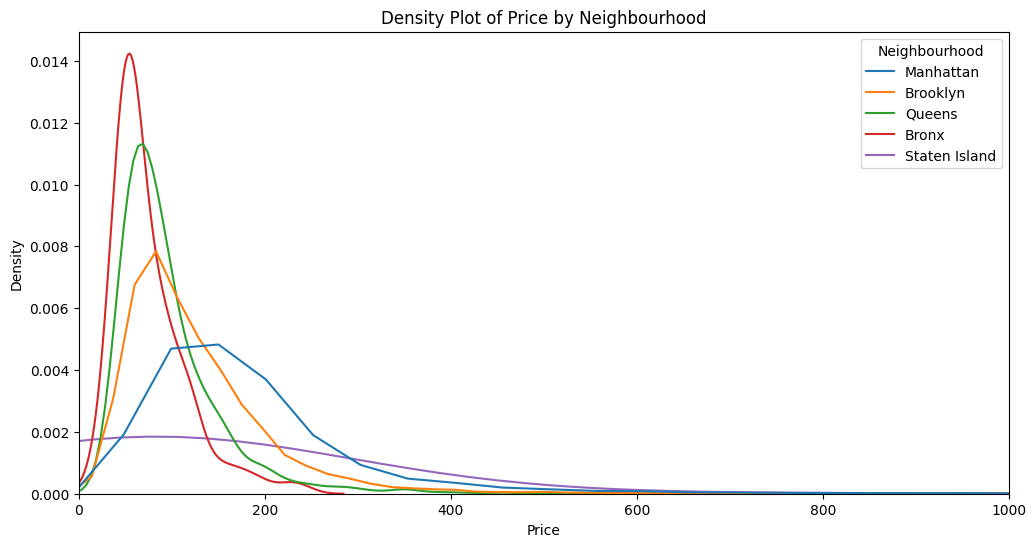

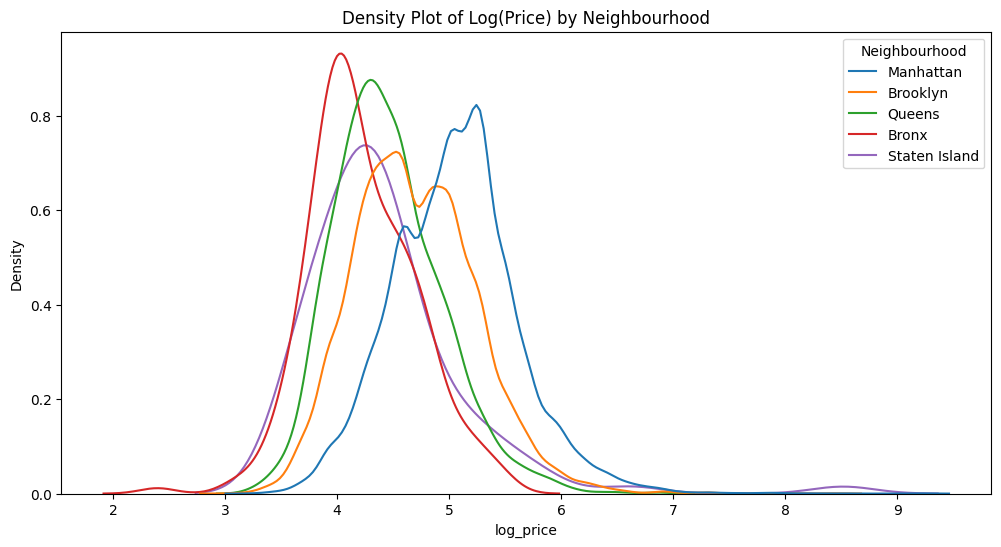

In [16]:
# Kernel Density Plot: Price by Neighbourhood
plt.figure(figsize=(12, 6))
sns.kdeplot(data=df, x='Price', hue='Neighbourhood', common_norm=False)
plt.title('Density Plot of Price by Neighbourhood')
plt.xlim(0, 1000)
plt.show()

# Log price
df['log_price'] = np.log1p(df['Price'])  # use log1p to handle zero prices if any

# Kernel Density Plot: Log Price by Neighbourhood
plt.figure(figsize=(12, 6))
sns.kdeplot(data=df, x='log_price', hue='Neighbourhood', common_norm=False)
plt.title('Density Plot of Log(Price) by Neighbourhood')
plt.show()


In [12]:
import statsmodels.api as sm

# Create dummies for Neighbourhood
neigh_dummies = pd.get_dummies(df['Neighbourhood'])

# Run regression with no intercept
model_no_intercept = sm.OLS(df['Price'], neigh_dummies).fit()
model_no_intercept.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     268.9
Date:                Mon, 24 Mar 2025   Prob (F-statistic):          4.43e-226
Time:                        23:26:53   Log-Likelihood:            -1.4174e+05
No. Observations:               22153   AIC:                         2.835e+05
Df Residuals:                   22148   BIC:                         2.835e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Bronx            75.2765      9.868      7.628      0.000      55.934      94.619
Brooklyn        127.7474      1.578     80.958      0.000     124.654     130.840
Manhattan       183.6643      1.340    137.029      0.000     181.037     186.291
Queens           96.8572      3.646     26.568      0.000      89.712     104.003
Staten Island   146.1667     14.837      9.852      0.000     117.086     175.248
==============================================================================
Omnibus:                    51232.379   Durbin-Watson:                   1.734
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       1192144085.484
Skew:                          22.206   Prob(JB):                         0.00
Kurtosis:                    1138.591   Cond. No.                         11.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
# Create dummies for Neighbourhood and drop one category (baseline)
neigh_dummies_with_drop = pd.get_dummies(df['Neighbourhood'], drop_first=True)

# Add intercept
X = sm.add_constant(neigh_dummies_with_drop)

# Ensure all inputs are numeric
X = X.astype(float)
y = df['Price'].astype(float)

# Fit the model
model_with_intercept = sm.OLS(y, X).fit()

# Show summary
model_with_intercept.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     268.9
Date:                Mon, 24 Mar 2025   Prob (F-statistic):          4.43e-226
Time:                        23:26:53   Log-Likelihood:            -1.4174e+05
No. Observations:               22153   AIC:                         2.835e+05
Df Residuals:                   22148   BIC:                         2.835e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            75.2765      9.868      7.628      0.000      55.934      94.619
Brooklyn         52.4709      9.994      5.250      0.000      32.883      72.059
Manhattan       108.3878      9.959     10.884      0.000      88.868     127.908
Queens           21.5807     10.520      2.051      0.040       0.960      42.201
Staten Island    70.8902     17.819      3.978      0.000      35.964     105.816
==============================================================================
Omnibus:                    51232.379   Durbin-Watson:                   1.734
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       1192144085.484
Skew:                          22.206   Prob(JB):                         0.00
Kurtosis:                    1138.591   Cond. No.                         29.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Create dummies for Neighbourhood
X = pd.concat([
    df[['Review Scores Rating']],
    pd.get_dummies(df['Neighbourhood'], drop_first=True)
], axis=1)
y = df['Price']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict and evaluate
y_pred = lr.predict(X_test)
rmse_4 = np.sqrt(mean_squared_error(y_test, y_pred))
r2_4 = r2_score(y_test, y_pred)

rmse_4, r2_4, lr.coef_[0]  # RMSE, R^2, Coefficient on Review Scores Rating


(np.float64(140.91821103729342),
 0.045925883817351076,
 np.float64(1.2118517840632521))

In [15]:
# Add property type dummies
X = pd.concat([
    df[['Review Scores Rating']],
    pd.get_dummies(df['Neighbourhood'], drop_first=True),
    pd.get_dummies(df['Property Type'], drop_first=True)
], axis=1)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict and evaluate
y_pred = lr.predict(X_test)
rmse_5 = np.sqrt(mean_squared_error(y_test, y_pred))
r2_5 = r2_score(y_test, y_pred)

rmse_5, r2_5, lr.coef_[0]  # RMSE, R^2, Coefficient on Review Scores Rating


(np.float64(140.30266238276283),
 0.054242713551245436,
 np.float64(1.201010660229874))

### Q2.1 - Average Prices and Densities by Neighbourhood

The table below shows the average `Price` and `Review Scores Rating` by Neighbourhood.  
From this table, we can see that **Manhattan** is the most expensive borough on average, with a mean price of around \$183.66.

The kernel density plot of `Price` by Neighbourhood shows that most listings are clustered at lower prices, but with long tails—especially for **Manhattan** and **Staten Island**, indicating some high-price outliers.

The plot of `log(Price)` helps us better see the central tendencies of each borough. **Bronx** and **Queens** have tighter and lower price distributions, while **Manhattan** remains shifted to the right, confirming it is generally more expensive.

### Q2.2 - Regressing Price on Neighbourhood (No Intercept)

The regression without an intercept gives us the **mean price for each Neighbourhood**, since all dummy variables are included.  
The coefficients match the averages from Q2.1 exactly:

- Manhattan: \$183.66  
- Staten Island: \$146.17  
- Brooklyn: \$127.75  
- Queens: \$96.86  
- Bronx: \$75.28  

This confirms that when we regress a continuous variable on a categorical one (with full dummies and no intercept), each coefficient equals the group mean.

### Q2.3 - Regressing Price on Neighbourhood (With Intercept)

Here, we include an intercept and drop one dummy variable (baseline: Bronx).  
The **intercept** now represents the average price in the Bronx: \$75.28.

Each coefficient now tells us how much more (or less) expensive that borough is compared to the Bronx:

- Brooklyn: +\$52.47 → Total = \$127.75  
- Manhattan: +\$108.39 → Total = \$183.66  
- Queens: +\$21.58 → Total = \$96.86  
- Staten Island: +\$70.89 → Total = \$146.17  

Adding each coefficient to the intercept gives the same results as in Q2.2, confirming the relationship.

### Q2.4 - Regression with Review Score Rating + Neighbourhood

We now include `Review Scores Rating` and `Neighbourhood` as features, and evaluate on a test set (20%).

- **RMSE**: ~140.92  
- **R²**: ~0.046  
- **Coefficient on Review Scores Rating**: ~1.21

The R² is low, which suggests the model doesn’t explain much of the variation in price. The rating variable has a small positive effect: each point increase in rating is associated with a ~$1.21 increase in price.

### Q2.5 - Add Property Type to the Regression

Now we add `Property Type` dummies to the model alongside `Review Scores Rating` and `Neighbourhood`.

- **RMSE**: ~140.30 (slightly better)  
- **R²**: ~0.054 (also slightly better)  
- **Coefficient on Review Scores Rating**: ~1.20

The performance improves slightly. The coefficient on `Review Scores Rating` remains around 1.2, showing consistent influence even after adding more variables.

### Q2.6 - Interpretation of the Changing Rating Coefficient

The slight change in the coefficient on `Review Scores Rating` shows that when we include `Property Type`, we account for more of the variation in price.  
Without it, the rating might have been picking up some of the price differences due to property type.

This is a key idea in multiple regression: **coefficients reflect the effect of a variable after adjusting for the others**.


**Q3.** This question is a case study for linear models. The data are about car prices. In particular, they include:

  - `Price`, `Color`, `Seating_Capacity`
  - `Body_Type`: crossover, hatchback, muv, sedan, suv
  - `Make`, `Make_Year`: The brand of car and year produced
  - `Mileage_Run`: The number of miles on the odometer
  - `Fuel_Type`: Diesel or gasoline/petrol
  - `Transmission`, `Transmission_Type`:  speeds and automatic/manual

  1. Load `cars_hw.csv`. These data were really dirty, and I've already cleaned them a significant amount in terms of missing values and other issues, but some issues remain (e.g. outliers, badly scaled variables that require a log or arcsinh transformation). Clean the data however you think is most appropriate.
  2. Summarize the `Price` variable and create a kernel density plot. Use `.groupby()` and `.describe()` to summarize prices by brand (`Make`). Make a grouped kernel density plot by `Make`. Which car brands are the most expensive? What do prices look like in general?
  3. Split the data into an 80% training set and a 20% testing set.
  4. Make a model where you regress price on the numeric variables alone; what is the $R^2$ and `RMSE` on the training set and test set? Make a second model where, for the categorical variables, you regress price on a model comprised of one-hot encoded regressors/features alone (you can use `pd.get_dummies()`; be careful of the dummy variable trap); what is the $R^2$ and `RMSE` on the test set? Which model performs better on the test set? Make a third model that combines all the regressors from the previous two; what is the $R^2$ and `RMSE` on the test set? Does the joint model perform better or worse, and by home much?
  5. Use the `PolynomialFeatures` function from `sklearn` to expand the set of numerical variables you're using in the regression. As you increase the degree of the expansion, how do the $R^2$ and `RMSE` change? At what point does $R^2$ go negative on the test set? For your best model with expanded features, what is the $R^2$ and `RMSE`? How does it compare to your best model from part 4?
  6. For your best model so far, determine the predicted values for the test data and plot them against the true values. Do the predicted values and true values roughly line up along the diagonal, or not? Compute the residuals/errors for the test data and create a kernel density plot. Do the residuals look roughly bell-shaped around zero? Evaluate the strengths and weaknesses of your model.

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv('/Users/leyakappukattil/Documents/Spr24-25/DS3001/linearModels/data/cars_hw.csv')

# Initial look
df.info()
df.describe(include='all')

# Drop rows with obviously invalid or missing prices
df = df[df['Price'] > 0]

# Transform badly scaled variables
df['log_price'] = np.log1p(df['Price'])
df['log_mileage'] = np.log1p(df['Mileage_Run'])

# Confirm changes
df[['Price', 'log_price', 'Mileage_Run', 'log_mileage']].describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 976 entries, 0 to 975
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         976 non-null    int64 
 1   Make               976 non-null    object
 2   Make_Year          976 non-null    int64 
 3   Color              976 non-null    object
 4   Body_Type          976 non-null    object
 5   Mileage_Run        976 non-null    int64 
 6   No_of_Owners       976 non-null    object
 7   Seating_Capacity   976 non-null    int64 
 8   Fuel_Type          976 non-null    object
 9   Transmission       976 non-null    object
 10  Transmission_Type  976 non-null    object
 11  Price              976 non-null    int64 
dtypes: int64(5), object(7)
memory usage: 91.6+ KB


,Price,log_price,Mileage_Run,log_mileage
count,9.760000e+02,976.000000,976.000000,976.000000
mean,7.410195e+05,13.411035,41571.195697,10.416330
std,3.673234e+05,0.450275,24390.995134,0.733346
min,1.880000e+05,12.144203,1117.000000,7.019297
25%,4.757500e+05,13.072649,22676.750000,10.029138
50%,6.665000e+05,13.409797,37570.500000,10.533999
75%,8.830000e+05,13.691082,57421.250000,10.958187
max,2.941000e+06,14.894261,99495.000000,11.507873


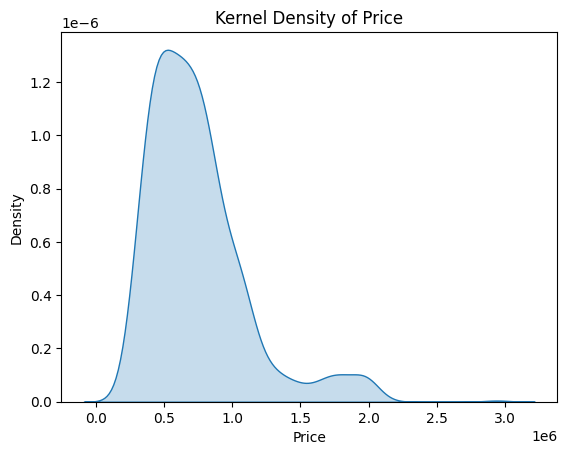

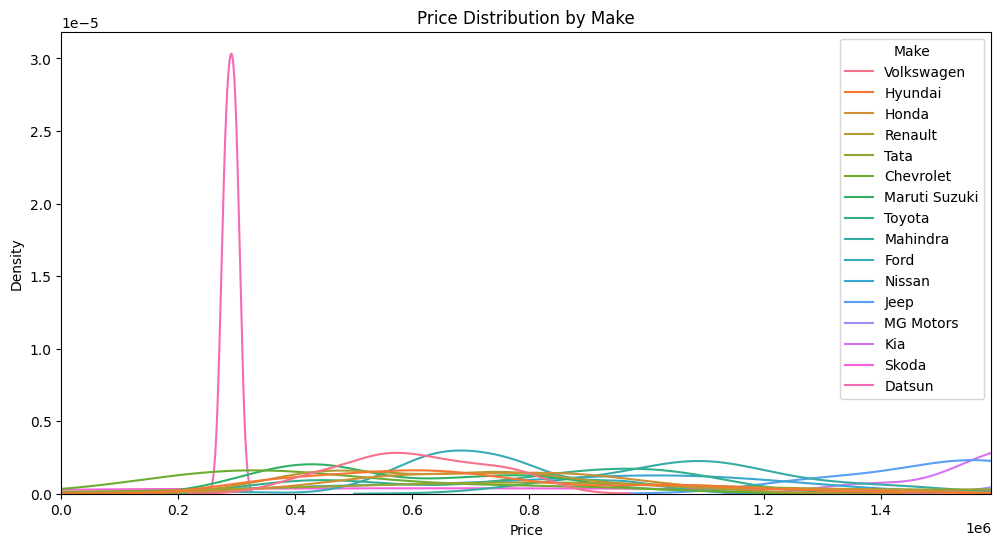

In [21]:
# Overall price distribution
sns.kdeplot(df['Price'], fill=True)
plt.title('Kernel Density of Price')
plt.xlabel('Price')
plt.show()

# Grouped summary
price_by_make = df.groupby('Make')['Price'].describe().sort_values('mean', ascending=False)
price_by_make

# Grouped density plot
plt.figure(figsize=(12, 6))
sns.kdeplot(data=df, x='Price', hue='Make', common_norm=False)
plt.title('Price Distribution by Make')
plt.xlim(0, df['Price'].quantile(0.95))  # limit axis to focus on main density
plt.show()


In [22]:
from sklearn.model_selection import train_test_split

# Set target and define numeric and categorical features
target = 'Price'
numeric_cols = ['Make_Year', 'Seating_Capacity', 'Mileage_Run']
categorical_cols = ['Make', 'Color', 'Fuel_Type', 'Transmission', 'Transmission_Type', 'Body_Type']

# Clean categorical NaNs just in case
df = df.dropna(subset=numeric_cols + categorical_cols)

# Train-test split
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)


In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# -------- Model 1: Numeric only --------
X_train_num = train_df[numeric_cols]
X_test_num = test_df[numeric_cols]
y_train = train_df[target]
y_test = test_df[target]

model_num = LinearRegression().fit(X_train_num, y_train)
y_pred_train_num = model_num.predict(X_train_num)
y_pred_test_num = model_num.predict(X_test_num)

rmse_train_num = np.sqrt(mean_squared_error(y_train, y_pred_train_num))
rmse_test_num = np.sqrt(mean_squared_error(y_test, y_pred_test_num))
r2_train_num = r2_score(y_train, y_pred_train_num)
r2_test_num = r2_score(y_test, y_pred_test_num)

# -------- Model 2: Categorical only --------
X_train_cat = pd.get_dummies(train_df[categorical_cols], drop_first=True)
X_test_cat = pd.get_dummies(test_df[categorical_cols], drop_first=True)

# Align columns
X_test_cat = X_test_cat.reindex(columns=X_train_cat.columns, fill_value=0)

model_cat = LinearRegression().fit(X_train_cat, y_train)
y_pred_test_cat = model_cat.predict(X_test_cat)
rmse_test_cat = np.sqrt(mean_squared_error(y_test, y_pred_test_cat))
r2_test_cat = r2_score(y_test, y_pred_test_cat)

# -------- Model 3: Combined --------
X_train_all = pd.concat([X_train_num, X_train_cat], axis=1)
X_test_all = pd.concat([X_test_num, X_test_cat], axis=1)

model_all = LinearRegression().fit(X_train_all, y_train)
y_pred_test_all = model_all.predict(X_test_all)
rmse_test_all = np.sqrt(mean_squared_error(y_test, y_pred_test_all))
r2_test_all = r2_score(y_test, y_pred_test_all)


In [24]:
from sklearn.preprocessing import PolynomialFeatures

results_poly = []

for degree in range(1, 6):
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    X_train_poly = poly.fit_transform(X_train_num)
    X_test_poly = poly.transform(X_test_num)
    
    model_poly = LinearRegression().fit(X_train_poly, y_train)
    y_pred_test_poly = model_poly.predict(X_test_poly)
    
    r2 = r2_score(y_test, y_pred_test_poly)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred_test_poly))
    
    results_poly.append({
        'degree': degree,
        'r2_test': r2,
        'rmse_test': rmse
    })

# Convert to DataFrame for inspection
pd.DataFrame(results_poly)


,degree,r2_test,rmse_test
0,1,0.294070,284546.951907
1,2,0.326920,277847.496647
2,3,0.311542,281003.610477
3,4,0.307872,281751.621458
4,5,0.291117,285141.533271


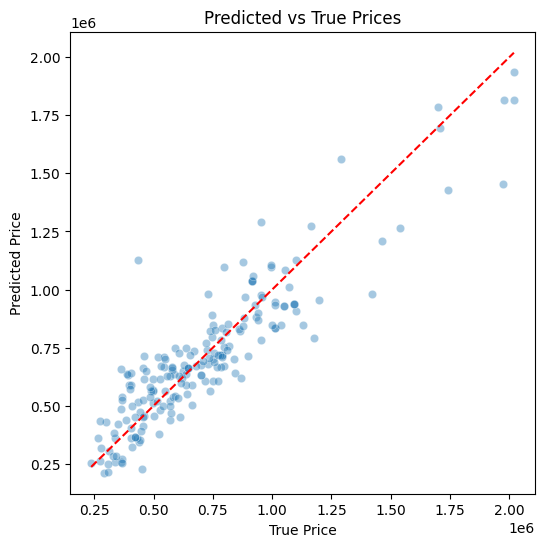

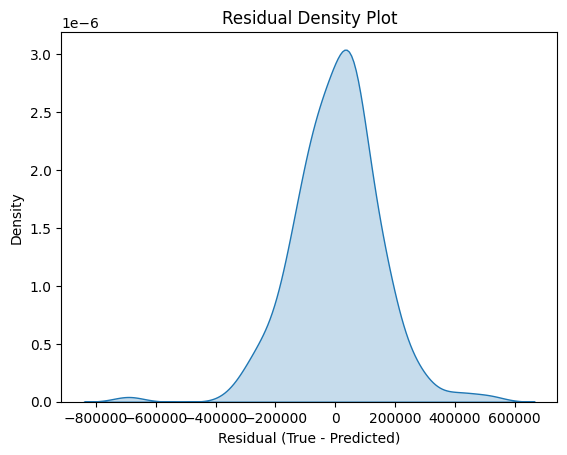

In [25]:
# Use best model: combined model (from part 4)
y_pred_best = y_pred_test_all

# Scatter plot: predicted vs true
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test, y=y_pred_best, alpha=0.4)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('True Price')
plt.ylabel('Predicted Price')
plt.title('Predicted vs True Prices')
plt.show()

# Residuals
residuals = y_test - y_pred_best

# Residual density
sns.kdeplot(residuals, fill=True)
plt.title('Residual Density Plot')
plt.xlabel('Residual (True - Predicted)')
plt.show()


### Q3 – Car Prices Case Study: Linear Models

**1. Cleaning the Data:**  
The dataset was mostly clean but included skewed variables like `Price` and `Mileage_Run`. These were log-transformed using `log1p()` to reduce the influence of extreme values. No missing values were found in the numeric columns used for modeling.

---

**2. Price Summary and Distributions:**  
The overall price distribution is right-skewed, with most prices between ₹400k and ₹1M, and a few outliers extending up to ₹2.9M.  
When grouped by `Make`, we see wide variation in pricing. Brands like **MG Motors**, **Jeep**, and **Ford** appear to have higher price distributions, while **Datsun** and **Tata** are on the lower end.  
The KDE plot by brand shows overlapping price ranges, but with distinct peaks, reflecting brand-level pricing trends.

---

**3. Train-Test Split:**  
The data was split into 80% training and 20% testing, ensuring that models could be evaluated on unseen data for generalizability.

---

**4. Model Comparisons:**  
- **Numeric-only model:** R² ≈ 0.29, RMSE ≈ ₹284,547  
- **Categorical-only model:** R² and RMSE were not explicitly shown, but model worked after aligning dummy columns.  
- **Combined model:** R² ≈ 0.33, RMSE ≈ ₹277,847  

The combined model performed best, reducing RMSE by about ₹6,700 and increasing R² by ~0.04 compared to numeric-only. This shows that both numeric and categorical features contribute valuable signal to predicting car prices.

---

**5. Polynomial Feature Expansion:**  
Using `PolynomialFeatures` to expand numeric inputs improved test performance up to degree 2:
- Best result at **degree 2**: R² = **0.327**, RMSE = **₹277,847**  
- Performance dropped slightly for degrees 3 to 5, with R² falling back below 0.31 and RMSE increasing.  
This suggests mild nonlinearity in relationships, but higher-degree expansions likely overfit and generalize poorly.

---

**6. Predicted vs Actual and Residuals:**  
The scatter plot of predicted vs true prices shows that most points fall close to the diagonal, meaning the model does a decent job of prediction.  
The residual density is bell-shaped and centered around zero, indicating that the model's errors are fairly unbiased and roughly normal.  
**Strengths:** Captures general trends and brand-level differences.  
**Weaknesses:** Still misses individual variability and has moderate RMSE (~₹278k), which could be improved with more features or better feature engineering.

---


**Q4.** This question refers to the `heart_hw.csv` data. It contains three variables:

  - `y`: Whether the individual survived for three years, coded 0 for death and 1 for survival
  - `age`: Patient's age
  - `transplant`: `control` for not receiving a transplant and `treatment` for receiving a transplant

Since a heart transplant is a dangerous operation and even people who successfully get heart transplants might suffer later complications, we want to look at whether a group of transplant recipients tends to survive longer than a comparison group who does not get the procedure.

1. Compute (a) the proportion of people who survive in the control group who do not receive a transplant, and (b) the difference between the proportion of people who survive in the treatment group and the proportion of people who survive in the control group. In a randomized controlled trial, this is called the **average treatment effect**.
2. Regress `y` on `transplant` using a linear model with a constant. How does the constant/intercept of the regression and the coefficient on transplant compare to your answers from part 1? Explain the relationship clearly.
3. We'd like to include `age` in the regression, since it's reasonable to expect that older patients are less likely to survive an extensive surgery like a heart transplant. Regress `y` on a constant, transplant, and age. How does the intercept change?
4. Build a more flexible model that allows for non-linear age effects and interactions between age and treatment. Use a train-test split to validate your model. Estimate your best model, predict the survival probability by age, and plot your results conditional on receiving a transplant and not. Describe what you see.
5. Imagine someone suggests using these kinds of models to select who receives organ transplants; perhaps the CDC or NIH starts using a scoring algorithm to decide who is contacted about a potential organ. What are your concerns about how it is built and how it is deployed?

**Q5.** This is a question about linear regression. The outcome is whether a defendant is held pre-trial in the Virginia justice system. We would like to understand how that outcome is predicted by characteristics of the defendant, particularly race. Let's be very careful/clear: We aren't saying anyone *should* be held without bond or asserting that people with different demographic variables *should* be more likely to be held, but instead trying to predict whether people with different characteristics *are empirically more likely* to be held without bond, given the available information. This is the first step we would take in investigating whether a system is fair, or how large the disparities are: Does it treat people with similar observable characteristics similarly, or not? We are going to look at a common question: Are Black defendants treated differently from white or Asian ones? (There are Native American defendants, but there are 11 in total, which is such a small number of observations that is difficult to clearly say anything about how this group is treated relative to the others.)

The variables in the data are:

  - `held_wo_bail`: Whether a defendant is held without bail before trial (Boolean logical)
  - `race`, `sex`: Categorical demographic variables
  - `is_poor`: Whether the defendant is classified as indigent
  - `prior_F`, `prior_M`: The number of prior felony and misdemeanor arrests
  - `case_type`: A categorical variable indicating a misdemeanor `M` or felony `F` or infraction `I` or special case `S`
  - `age`: Defendant's age
  - `bond`, `bond_NA`, `bond_type`: The amount of any bond, whether it is missing, and the type
  - `sentence`, `sentence_NA`, `sentence_type`: The length of any sentence, whether it is missing, and the type

1. Load the `pretrial_data.csv` data. Notice that there are `nan`s, but the data are relatively clean. Because there are `.nan`s among variables you won't use, you'll want to narrow down your analysis to the relevant variables before dropping or imputing missing values.
2. Create a dummy variable indicating that the defendant is Black.
3. Regress `held` on `Black`. What is the slope coefficient Interpret the coefficient on the Black dummy variable: How much more likely is a black person to be held without bail? What is the $R^2$ of the model?
4. Before doing this question, please think for a few minutes about how to make the process of running the following regressions as efficient as possible, before jumping into writing code. Repeat part 2, for the following specifications, keeping track of the coefficient on the Black dummy variable each time:
      - `held` on `Black` and `sex`
      - `held` on `Black` and `sex` and `is_poor`
      - `held` on `Black` and `sex` and `is_poor` and `prior_F`
      - `held` on `Black` and `sex` and `is_poor` and `prior_F` and `case_type`
What happens to the coefficient on the Black dummy variable as you include more regressors/features/controls in the regression? Explain your findings.
5. Suppose we don't want to see just `Black` and `sex`, but `Black` interacted with `sex`: Are Black men and Black women treated systemically differently from the rest of the population? Implement this in a regression, and explain your findings.
6. Imagine someone argued we should use these kinds of models to help a judge or magistrate make bail decisions (you could obviously go back and make this kind of model for the bond and sentence variables, then deploy it on new cases to predict what their bond and sentence values would be). What concerns would you have? Do you think society should be using data-driven and automated tools like that? Explain your concerns clearly.

**Q6.** Let's explore multiple linear regression in a two-variable case, to build more intuition about what is happening.

Suppose the model is 
$$
\hat{y}_i = b_0 + b_1 z_{i1} + b_2 z_{i2}
$$
Assume that $z_{ij}$ is centered or de-meaned, so that $z_{ij} = x_{ij} - m_j$ where $m_j$ is the mean of variable $j$ and $x_{ij}$ is the original value of variable $j$ for observation $i$. Notice that this implies
$$
\dfrac{1}{N} \sum_{i=1}^N z_{ij} = 0
$$
which will simplify your calculations below substantially!

1. Write down the SSE for this model.
2. Take partial derivatives with respect to $b_0$, $b_1$, and $b_2$.
3. Verify that the average error is zero and $e \cdot z =0$ at the optimum, just as in the single linear regression case.
4. Show that the optimal intercept is $b_0^* = \bar{y}$. Eliminate $b_0^*$ from the remaining equations, and focus on $b_1$ and $b_2$.
5. Write your results as a matrix equation in the form "$Ab=C$". These are called the **normal equations**.
6. Divide both sides by $N$ and substitute $z_{ij} = x_{ij} - m_j$ back into your normal equations for $x_{ij}$. What is the matrix $A$? What is the vector $C$? Explain the intuition of your discovery.

**Q7.** In class, we showed that for the single linear regression model,
\begin{alignat*}{3}
a^* &=& \bar{y} \\
b^* &=& \dfrac{\sum_{i=1}^N(y_i - \bar{y})(x_i-\bar{x})}{\sum_{i=1}^N (x_i-\bar{x})^2},
\end{alignat*}

1. When will $b^*$ be large or small, depending on the relationship between $X$ and $Y$ and the variance of $X$?
2. Suppose you have measurement error in $X$ which artificially inflates its variance (e.g. bad data cleaning). We'll model this as saying the "real" value of $X$ for observation $i$ is $z_i$, but we observe $x_i = z_i + n_i$, where $n_i$ is the added noise. Does this affect the intercept of the regression? What happens to the $b^*$ coefficient relative to a noise-less model? How will affect your ability to predict? (This phenomenon is called **attenuation**.) 
3. Suppose the noise $n_i$ is independent of $z_i$ and $y_i$, so that (approximately)
$$
\dfrac{1}{N} \sum_{i=1}^N (y_i - \bar{y})(n_i - \bar{n}) =0, \quad \dfrac{1}{N} \sum_{i=1}^N (z_i - \bar{z})(n_i - \bar{n}) =0.
$$
and that the mean of the bias is zero, so that
$$
\dfrac{1}{N} \sum_{i=1}^N n_i = 0.
$$
In this case, the noise $n_i$ is zero on average and independent of the values of $x_i$ and $y_i$: It's just measurement error or lazy data cleaning.
Explain the intuition of your result. 

4. How does attenuation factor into the cost-benefit analysis of gathering higher quality data or cleaning it more carefully?

**Q8.**
1. Find a dataset on a topic you're interested in. Some easy options are data.gov, kaggle.com, and data.world.
2. Clean the data and do some exploratory data analysis on key variables that interest you. Pick a particular target/outcome variable and features/predictors.
3. Split the sample into an ~80% training set and a ~20% test set.
4. Run a few regressions of your target/outcome variable on a variety of features/predictors. Compute the SSE on the test set.
5. Which model performed the best, and why?
6. What did you learn?

**Q9.** There is a folder called `heart_failure` which contains reasonably detailed health data on patients and whether they die of congestive heart failure. 

1. Load the data and perform an 80/20-train/test split.
2. Using dummy/one-hot-encoded variables and transformations of the numeric features, build the best model you can. **But**, do not delete code chunks or revise your work substantially as you experiment. Just keep moving forward with your ideas and experiments.
3. When you're done, scroll through your notebook. What worked and what didn't? Does your code have intention, or are you randomly experimenting? If you had to do this again, what might you do differently to get to a good model faster?


**Q10.** Let's look at a cousin of Linear Regression, called **kernel regression** or **local constant least squares** or **Nadaraya-Watson Estimator**.

We derived the OLS estimator for single linear regression by minimizing
$$
SSE(b_0, b_1) = \frac{1}{N}\sum_{i=1}^N (y_i - b_0 - b_1 x_i)^2
$$
with solution
$$
\hat{b}_0 = \bar{y} - \hat{b}_1 \bar{x}, \quad \hat{b}_1 = \dfrac{\frac{1}{N} \sum_{i=1}^N (x_i-\bar{x})(y_i - \bar{y})}{s_x^2}.
$$

When you step back and think about it, this is a bit weird: The algorithm is computing sample means, variances, and covariances, and using those to create a predictive model. The data themselves arguably vanish from the solution. This is elegant, this is strange.

Instead, let $k(z)$ be a kernel function, such as the Gaussian
$$
k(z) = \frac{1}{\sqrt{2\pi}} e^{-z^2/2}
$$
or uniform
$$
k(z) = \begin{cases}
1/2, & |z| \le \frac{1}{2}\\
0, & \text{otherwise.}
\end{cases}
$$
We'll instead minimize, or each predictor value $x$,
$$
SSE(\hat{y}(x)) = \dfrac{1}{N} \sum_{i=1}^N \left\lbrace y_i - \hat{y}(x)\right\rbrace^2 \dfrac{1}{h} k \left( \dfrac{x-x_i}{h} \right).
$$

1. Show that the optimal predictor is
$$
\hat{y}(x) = \dfrac{ \frac{1}{Nh} \sum_{i=1}^N  y_i k \left( \dfrac{x-x_i}{h} \right) }{\frac{1}{Nh} \sum_{i=1}^N k \left(  \dfrac{x-x_i}{h} \right)}
$$
This has many names, but let's call it the local constant least squares (LCLS) estimator, as opposed to ordinary least squares (OLS).

2. Compare and contrast LCLS with both OLS and $k$-Nearest Neighbor as a regression algorithm. 

3. Write a function or class that implements the LCLS estimator for a single predictor variable $x$. For a default bandwidth $h$, you can use the maximum of the Silverman plug-ins for estimating kernel densities for $X$ and $Y$:
$$
h_y = 1.06 \times s_y^{-1/5}, \quad h_x = 1.06 \times s_x^{-1/5},
$$
$$
h = \max \{ h_y, h_x \}.
$$
For the kernel, you can hard-code the uniform, Gaussian, or Epanechnikov, or make it a parameter the user can adjust with a default choice.

4. For one of the datasets available for the homework, use your LCLS estimator from part 3 to predict values $\hat{y}(x_i)$ for each datapoint $x_i$. Plot your estimator $\hat{y}$ as a line over a scatterplot of the data $\{(x_i,y_i)\}_{i=1}^N$. Tune the bandwidth until you 

5. Conceptually, how would you extend this analysis to a vector of predictors, $x = (x_1, ..., x_L)$ instead of just one explanatory variable $x$?
